## CART (Classification and Regression Tree)

In [113]:
import pandas as pd

data = {
    "Hours_Studied": ["Low", "Low", "Medium", "High", "High", "Medium", "Low", "High", "Medium", "Low", "High", "Medium"],
    "Attendance": ["Poor", "Good", "Good", "Good", "Poor", "Poor", "Poor", "Good", "Good", "Good", "Poor", "Good"],
    "Preparation_Course": ["No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"],
    "Pass": ["No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

   Hours_Studied Attendance Preparation_Course Pass
0            Low       Poor                 No   No
1            Low       Good                 No   No
2         Medium       Good                Yes  Yes
3           High       Good                Yes  Yes
4           High       Poor                 No   No
5         Medium       Poor                Yes  Yes
6            Low       Poor                 No   No
7           High       Good                Yes  Yes
8         Medium       Good                 No  Yes
9            Low       Good                Yes  Yes
10          High       Poor                 No   No
11        Medium       Good                Yes  Yes


## CART uses gini index for classification and standard deviation reduction for regression.we first Classification.

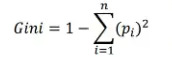

## Let's compute gini for Hours_Studied (Low,Medium,High)

In [114]:
#For low has 1 YES , 3 NO
low_gini = 1 - ((1/4)**2 + (3/4)**2)
#For medium has 4 YES , 0 NO
medium_gini = 1 - ((4/4)**2 + (0/4)**2)
#For high has 2 YES , 2 NO
high_gini = 1 - ((2/4)**2 + (2/4)**2)

In [115]:
print(low_gini,medium_gini,high_gini)

0.375 0.0 0.5


## Compute weighted gini index : weighted_gini = (4/12)*low_gini + (4/12)*medium_gini + (4/12)*high_gini


In [116]:
weighted_gini_Hours_Studied=(4/12)*low_gini + (4/12)*medium_gini + (4/12)*high_gini
print(weighted_gini_Hours_Studied)

0.29166666666666663


## Let's compute gini for Attendance (Poor,Good)


In [117]:
#For poor has 1 YES , 4 NO
poor_gini = 1 - ((1/5)**2 + (4/5)**2)
#For good has 6 YES , 1 NO
good_gini = 1 - ((6/7)**2 + (1/7)**2)

In [118]:
print(poor_gini,good_gini)

0.31999999999999984 0.24489795918367352


## Weighted gini index : weighted_gini = (5/12)*poor_gini + (7/12)*good_gini

In [119]:
weighted_gini_attendence=(5/12)*poor_gini+(7/12)*good_gini
print(weighted_gini_attendence)

0.2761904761904762


## Let's compute for Preparation Course

In [120]:
#For yes has 6 YES , 0 NO
yes_gini = 1 - ((6/6)**2 + (0/5)**2)
#For no has 1 YES , 5 NO
no_gini = 1 - ((1/6)**2 + (5/6)**2)

## weighted_gini = (5/12)*yes_gini + (7/12)*no_gini

In [121]:
weighted_gini_Preparation_course=(5/12)*yes_gini+(7/12)*good_gini
print(weighted_gini_Preparation_course)

0.1428571428571429


## Lowest gini considered as root node . So Preparation Course feature has lowest gini

In [122]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [123]:
df['Hours_Studied']=LabelEncoder().fit_transform(df['Hours_Studied'])
df['Attendance']=LabelEncoder().fit_transform(df['Attendance'])
df['Preparation_Course']=LabelEncoder().fit_transform(df['Preparation_Course'])

In [124]:
X=df[['Hours_Studied','Attendance','Preparation_Course']]
y=df['Pass']

In [125]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [127]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

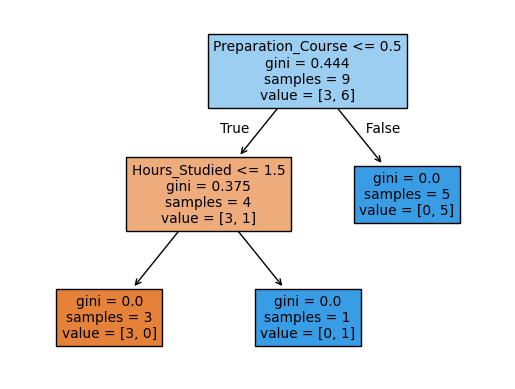

In [128]:
plot_tree(dtree,filled=True,feature_names=['Hours_Studied','Attendance','Preparation_Course'])
plt.show()

In [129]:
print(accuracy_score(ytest,dtree.predict(Xtest)))

1.0


## Now for regression (Standard deviation reduction method)

In [130]:
data = {
    "TV": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2],
    "Radio": [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6],
    "Newspaper": [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6],
    "Sales": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2]
}
df = pd.DataFrame(data)
print(df)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2


In [131]:
#Binarize it
df_sorted = df.sort_values(by="TV").reset_index(drop=True)
df_sorted["TV_bin"] = (df_sorted["TV"] <= 100).astype(int)
df_sorted["Radio_bin"] = (df_sorted["Radio"] <= 30).astype(int)
df_sorted["Newspaper_bin"] = (df_sorted["Newspaper"] <= 50).astype(int)

df_final = df_sorted.drop(columns=["TV", "Radio", "Newspaper"])

print(df_final)

   Sales  TV_bin  Radio_bin  Newspaper_bin
0    7.2       1          0              0
1    9.3       1          0              0
2   10.4       1          0              1
3   11.8       1          0              1
4   13.2       0          1              1
5   18.5       0          0              0
6   12.9       0          1              0
7   22.1       0          0              0


## compute std dev for Sales

In [132]:
std_sales=df_final['Sales'].std()
print(std_sales)

4.904735321240951


## compute std dev for TV bin

In [133]:
import numpy as np
tv_group_a = np.array([13.2, 18.5, 12.9, 22.1])
tv_std_a = np.std(tv_group_a, ddof=1)

In [134]:
tv_group_b = np.array([7.2, 9.3, 10.4, 11.8])
std_b = np.std(tv_group_b, ddof=1)

In [135]:
print(tv_std_a,std_b)

4.437998798257311 1.941434177783699


In [136]:
print(tv_group_a,tv_group_b)

[13.2 18.5 12.9 22.1] [ 7.2  9.3 10.4 11.8]


In [137]:
((4/8)*4.437998798257311)+((4/8)*1.941434177783699)

3.189716488020505

In [138]:
tv_reduction=4.904735321240951-3.189716488020505
print(tv_reduction)

1.7150188332204457


## compute std dev for Radio bin

In [139]:
df["Radio_bin"] = (df["Radio"] <= 30).astype(int)
radio_group_0 = df[df["Radio_bin"] == 0]["Sales"].values
radio_group_1 = df[df["Radio_bin"] == 1]["Sales"].values

std_0 = np.std(radio_group_0, ddof=1)
std_1 = np.std(radio_group_1, ddof=1)

In [140]:
print(radio_group_0,radio_group_1)

[22.1 10.4  9.3 18.5  7.2 11.8] [12.9 13.2]


In [141]:
((6/8)*4.437998798257311)+((2/8)*4.437998798257311)

4.437998798257311

In [142]:
radio_bin_reduction=4.904735321240951-4.437998798257311
print(radio_bin_reduction)

0.46673652298363955


## compute std dev for newpaper

In [143]:
newspaper_group_0 = np.array([7.2, 9.3, 18.5, 12.9, 22.1])
std_0 = np.std(newspaper_group_0, ddof=1)
newspaper_group_1 = np.array([10.4, 11.8, 13.2])
std_1 = np.std(newspaper_group_1, ddof=1)

In [144]:
print(newspaper_group_0,newspaper_group_1)

[ 7.2  9.3 18.5 12.9 22.1] [10.4 11.8 13.2]


In [145]:
((5/8)*4.437998798257311)+((3/8)*4.437998798257311)

4.437998798257311

In [146]:
newspaper_reduction=4.904735321240951-4.437998798257311
print(newspaper_reduction)

0.46673652298363955


In [150]:
from sklearn.tree import DecisionTreeRegressor
X=df_final[['TV_bin','Radio_bin','Newspaper_bin']]
y=df_final['Sales']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
dtree2=DecisionTreeRegressor(criterion='squared_error')
dtree2.fit(Xtrain,ytrain)

DecisionTreeRegressor()

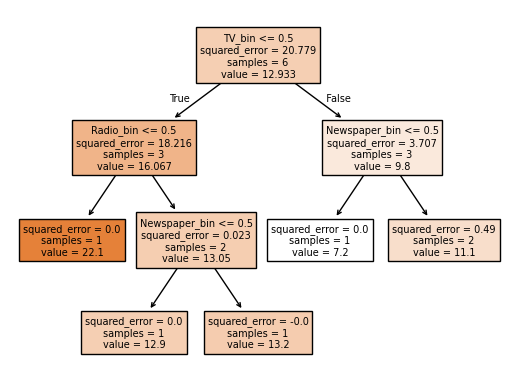

In [151]:
plot_tree(dtree2,filled=True,feature_names=['TV_bin','Radio_bin','Newspaper_bin'])
plt.show()

## Highest Reduction → Root Node
In regression trees, the feature that gives the highest reduction in standard deviation becomes the root node.

Why?
Because it reduces impurity the most — meaning it explains the variation in the target (Sales) better than other features.